In [43]:
###shapiro testi
###normal dağılım mı değil mi test ediyorum
##statistic değerine bakıp tvalue bulduğun değer, pvalue kapsadığın alan yani pvalue alfadan büyükse normal dağılım diyosun 
###artık t test yapabilirim demek oluyor bu

from scipy.stats import shapiro
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
               157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
               203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
       216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])
stat,p=shapiro(olcumler)
print('Statictics=%.3f, p=%.3f' %(stat,p))

alpha=0.5
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject)')  
else:
    print('Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject)')

Statictics=0.985, p=0.785
Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject)


In [44]:
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt

In [45]:
#01/09/2019


#olcumler data'mın ortalaması 170 dedim.Ho=170 kabul ettim.Bunu test edicem. Twosided bir ölçüm cunku eşitlik H0 da
#statistic pvalue'ya denk gelen alanın değeri
stats.ttest_1samp(olcumler, popmean=170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [46]:
#0.25'lik alana denk gelen x değerini bulduk, bu alanı veren x değerini buluyoruz
stats.t.ppf(q=0.025, df=len(olcumler) -1)

-2.0095752344892093

In [47]:
##bu istatistik değerinde bana p value ver diyorum, yani alanı
##çıkan tüm p valueları kendi alfamızla kontrol ediyoruz, alpha/2 ile değil
stats.t.cdf(x=-2.1753117985877966,df=len(olcumler)-1)*2

0.034460415195071446

In [48]:
import statsmodels.stats.api as sms
#aralıklarımız
sms.DescrStatsW(olcumler).tconfint_mean()

(139.95008462736266, 168.80991537263733)

In [63]:
#bağımsız iki örneklem arasındaki ilişkiyi karşılaştırmak istiyorum
import pandas as pd
import numpy as np

#a ve b yi columnlarla çizdirelim
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25]) 
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])
A_B=pd.concat([A,B],axis=1)
A_B.columns =["A","B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [64]:
#Grupları 2 farklı dataya böldük, sonra alt alta ekliycez
GRUP_A=np.arange(len(A))
GRUP_A=pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A=pd.concat([A,GRUP_A],axis=1)
A.columns=['GELIR','GRUP']
A.head()

,GELIR,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [65]:
GRUP_B=np.arange(len(B))
GRUP_B=pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B=pd.concat([B,GRUP_B],axis=1)
B.columns=['GELIR', 'GRUP']
B.head()

,GELIR,GRUP
0,37,B
1,39,B
2,31,B
3,31,B
4,34,B


In [67]:
#A ve Bleri birleştirelim, Gelirler A ve B olarak gruplarda birleşmiş oldu
AB=pd.concat([A,B])
AB
AB.columns=["GELIR","GRUP"]
AB.head()

,GELIR,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


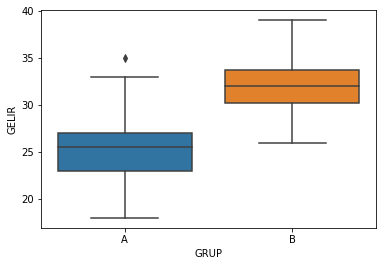

In [58]:
#box plot çizdirelim, GRUP ve Gelir değerleri olsun
import seaborn as sns
sns.boxplot(x="GRUP", y="GELIR",data=AB)

In [68]:
#varsayım kontrolu
#normality ve constant varyansa bakıcam
from scipy.stats import shapiro


In [73]:
shapiro(AB.GELIR)

(0.9816120862960815, 0.5004147291183472)

In [74]:
shapiro(B.GELIR)

(0.9561260342597961, 0.24584221839904785)

In [75]:
from scipy.stats import shapiro
shapiro(A_B.B)

(0.9561260342597961, 0.24584221839904785)

In [76]:
from scipy.stats import shapiro
shapiro(A_B.A)

(0.9789242148399353, 0.7962799668312073)

In [77]:
from scipy.stats import levene
levene(A_B.A,A_B.B)  #equal variance test, p value 0.05'den büyük 

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [78]:
#t test individual yapıcaz 2 farklı grubu karşılaştırıcaz
from scipy import stats
stats.ttest_ind(A_B["A"],A_B["B"],equal_var=True)  #varyansların eşit olması aynı cins verileri karşılaştırmamı sağlıyor

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [79]:
from scipy.stats import levene 
levene(A_B.A, A_B.B) #equal variance test
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,121,118,124,121,125,115,115,119,118,121,117,117,120,120,121,117,118,117,123,118,124,121,115,118,125,115])
sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,134,134,124,140,134,129,129,138,134,124,122,126,133,127,130,130,130,132,117,130,125,129,133,120,127,123])

In [86]:
BIRLIKTE = pd.concat([oncesi,sonrasi],axis=1)
BIRLIKTE.columns=["oncesi","sonrasi"]
BIRLIKTE.head()

,oncesi,sonrasi
0,123,118
1,119,127
2,119,122
3,116,132
4,123,129


In [87]:
import numpy as np
import scipy.stats as st
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt

In [92]:
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:]="ONCESI"
A=pd.concat([oncesi, GRUP_ONCESI],axis=1)
A.columns=["skor","grup"]
A.head()

,skor,grup
0,123,ONCESI
1,119,ONCESI
2,119,ONCESI
3,116,ONCESI
4,123,ONCESI


In [93]:
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:]="SONRASI"
B=pd.concat([sonrasi, GRUP_SONRASI],axis=1)
B.columns=["skor","grup"]
B.head()

,skor,grup
0,118,SONRASI
1,127,SONRASI
2,122,SONRASI
3,132,SONRASI
4,129,SONRASI


In [94]:
##verileri alt alta birleştirelim
AB=pd.concat([A,B])
AB.columns=["SKOR","ONCESI_SONRASI"]
AB.head()

,SKOR,ONCESI_SONRASI
0,123,ONCESI
1,119,ONCESI
2,119,ONCESI
3,116,ONCESI
4,123,ONCESI


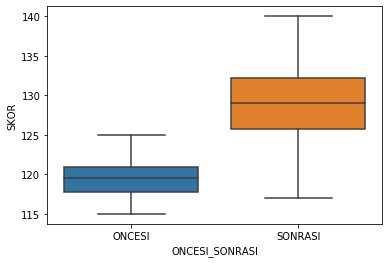

In [96]:
#boxplotuna bakalım
import seaborn as sns
sns.boxplot(x="ONCESI_SONRASI", y="SKOR",data=AB)

In [97]:
from scipy.stats import shapiro
#pvalue'muz alphadan buyuk olduğu için normal dağılım
shapiro(BIRLIKTE.oncesi)

(0.9543656706809998, 0.10722451657056808)

In [98]:
shapiro(BIRLIKTE.sonrasi)

(0.9780089259147644, 0.6159515380859375)

In [99]:
stat,p =shapiro(BIRLIKTE.oncesi)

print('Alanı veren nokta =%.3f, p=%.3f' %(stat,p))

alpha=0.05
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject H0)')  
else:
    print('Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject H0)')

Alanı veren nokta =0.954, p=0.107
Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject H0)


In [100]:
stat,p=shapiro(BIRLIKTE.sonrasi)

print('Alanı veren nokta =%.3f, p=%.3f' %(stat,p))

alpha=0.05
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject H0)')  
else:
    print('Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject H0)')

Alanı veren nokta =0.978, p=0.616
Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject H0)


In [101]:
from scipy.stats import levene
stat,p = levene(BIRLIKTE.oncesi,BIRLIKTE.sonrasi)  #equal variance test

print('Alanı veren nokta =%.3f, p=%.3f' %(stat,p))

alpha=0.05
if p >alpha:
    print('Orneklem Sabit varyansa(constant variance) sahiptir, ((Fail to reject H0))')  
else:
    print('Orneklem Sabit varyansa(constant variance) sahip değildir, ((Reject H0))')

Alanı veren nokta =8.313, p=0.005
Orneklem Sabit varyansa(constant variance) sahip değildir, ((Reject H0))


In [102]:
###ANOVA - birden fazla grup olduğunda karşılaştırma yaparken 
## 3 grup için sırayla shapiro, levene, oneway(anova) yapıcam
import pandas as pd
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])
B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])
C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])
dfs=[A,B,C]
ABC=pd.concat(dfs,axis=1)
ABC.columns =["GRUP_A","GRUP_B","GRUP_C"]
ABC.describe().T  #tanımlayıcı istatistiklerine bakıyoruz, T transpose alıyor


,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


In [103]:
#varsayımlar,normal dağılım mı değil mi bakalım
from scipy.stats import shapiro
stat,p=shapiro(ABC["GRUP_A"])

In [104]:
print('GRUP_A için ; Alanı veren nokta =%.3f, p=%.3f' %(stat,p))
alpha=0.05
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject H0)')  
else:
    print('Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject H0)')

GRUP_A için ; Alanı veren nokta =0.970, p=0.532
Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject H0)


In [105]:
stat,p=shapiro(ABC["GRUP_B"])
print('GRUP_B için ; Alanı veren nokta =%.3f, p=%.3f' %(stat,p))
alpha=0.05
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject H0)')  
else:
    print('Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject H0)')

GRUP_B için ; Alanı veren nokta =0.979, p=0.798
Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject H0)


In [106]:
stat,p=shapiro(ABC["GRUP_C"])
print('GRUP_C için ; Alanı veren nokta =%.3f, p=%.3f' %(stat,p))
alpha=0.05
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject H0)')  
else:
    print('Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject H0)')

GRUP_C için ; Alanı veren nokta =0.958, p=0.274
Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject H0)


In [108]:
from scipy.stats import levene
levene(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])  #equal variance test,p value alphadan buyukse sabit varyans

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

In [109]:
#normal dağılımım var ve sabit varyans var anova için uygunum
#3 gruptan en az bir tanesi farklı, ortalamaları aynı değil, burada ayrım için işe yarar bir değişken bulmaya çalışıyorum
from scipy.stats import f_oneway
f_oneway(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [110]:
##iris datası üzerinde simdi testleri ve yöntemleri deneyelim

import seaborn.apionly as sns
iris = sns.load_dataset('iris')
iris.head()

C:\Users\asus1\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\asus1\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\asus1\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\asus1\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\asus1\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecate

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


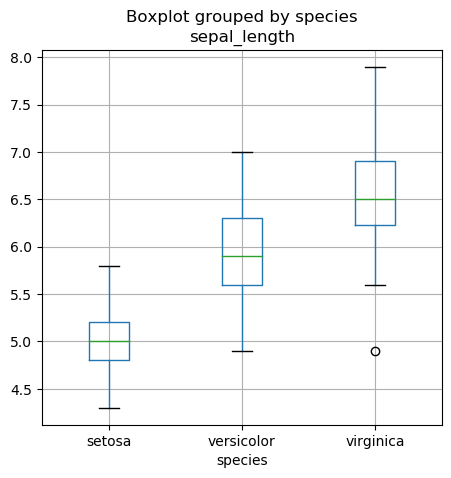

In [112]:
#3 species için nasıl değişiyor box plot ona bakıcaz, sepal_lenght ile türler arası nasıl bir değişim var görebiliriz.
iris.boxplot(column= "sepal_length",
            by='species',
            figsize=(5,5))

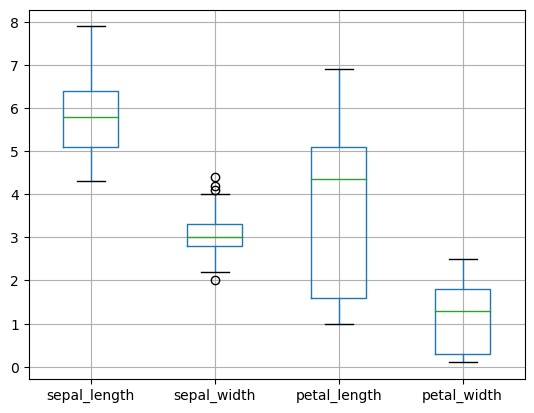

In [113]:
iris.boxplot()

C:\Users\asus1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """
C:\Users\asus1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


<Figure size 640x480 with 0 Axes>

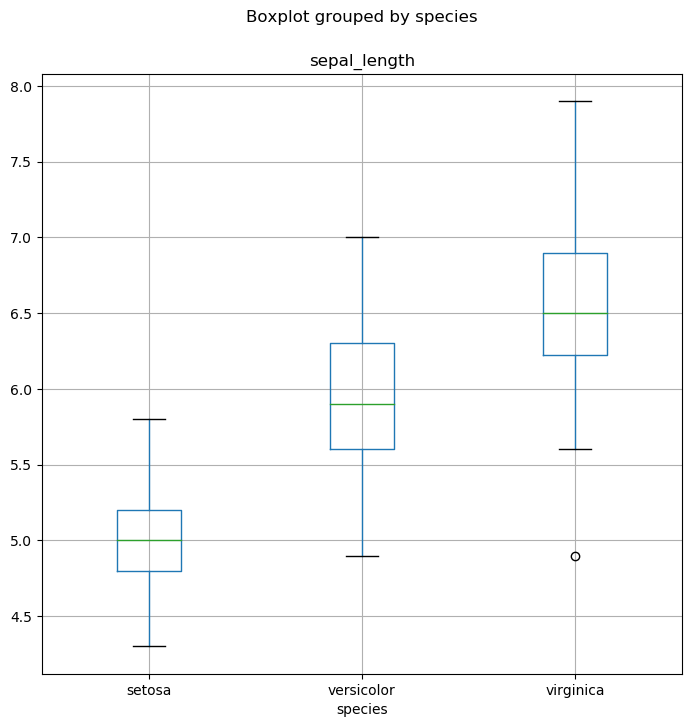

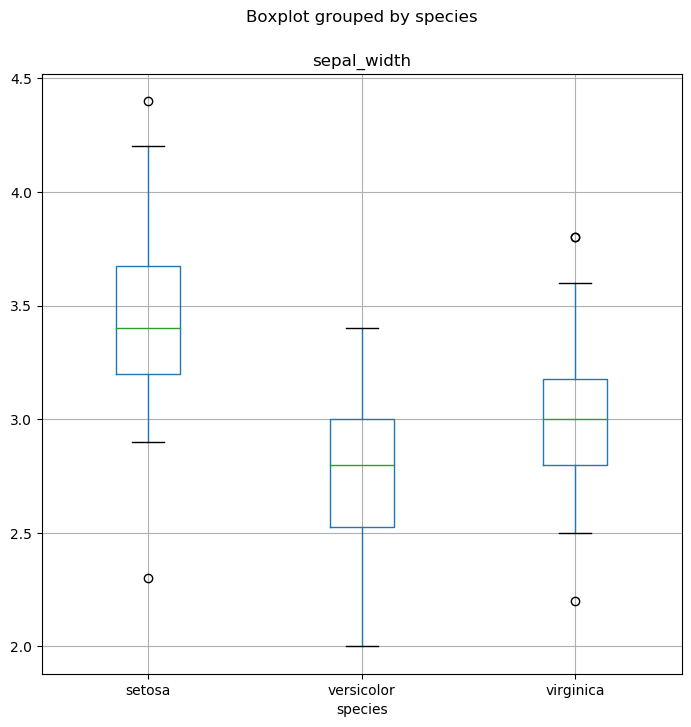

In [114]:
import matplotlib.pyplot as plt

f=plt.figure(1)
iris.boxplot(column="sepal_length", by="species", figsize=(8,8))
f.show()
g=plt.figure(2)
iris.boxplot(column="sepal_width", by="species", figsize=(8,8))
g.show()

Text(0, 0.5, 'Count')

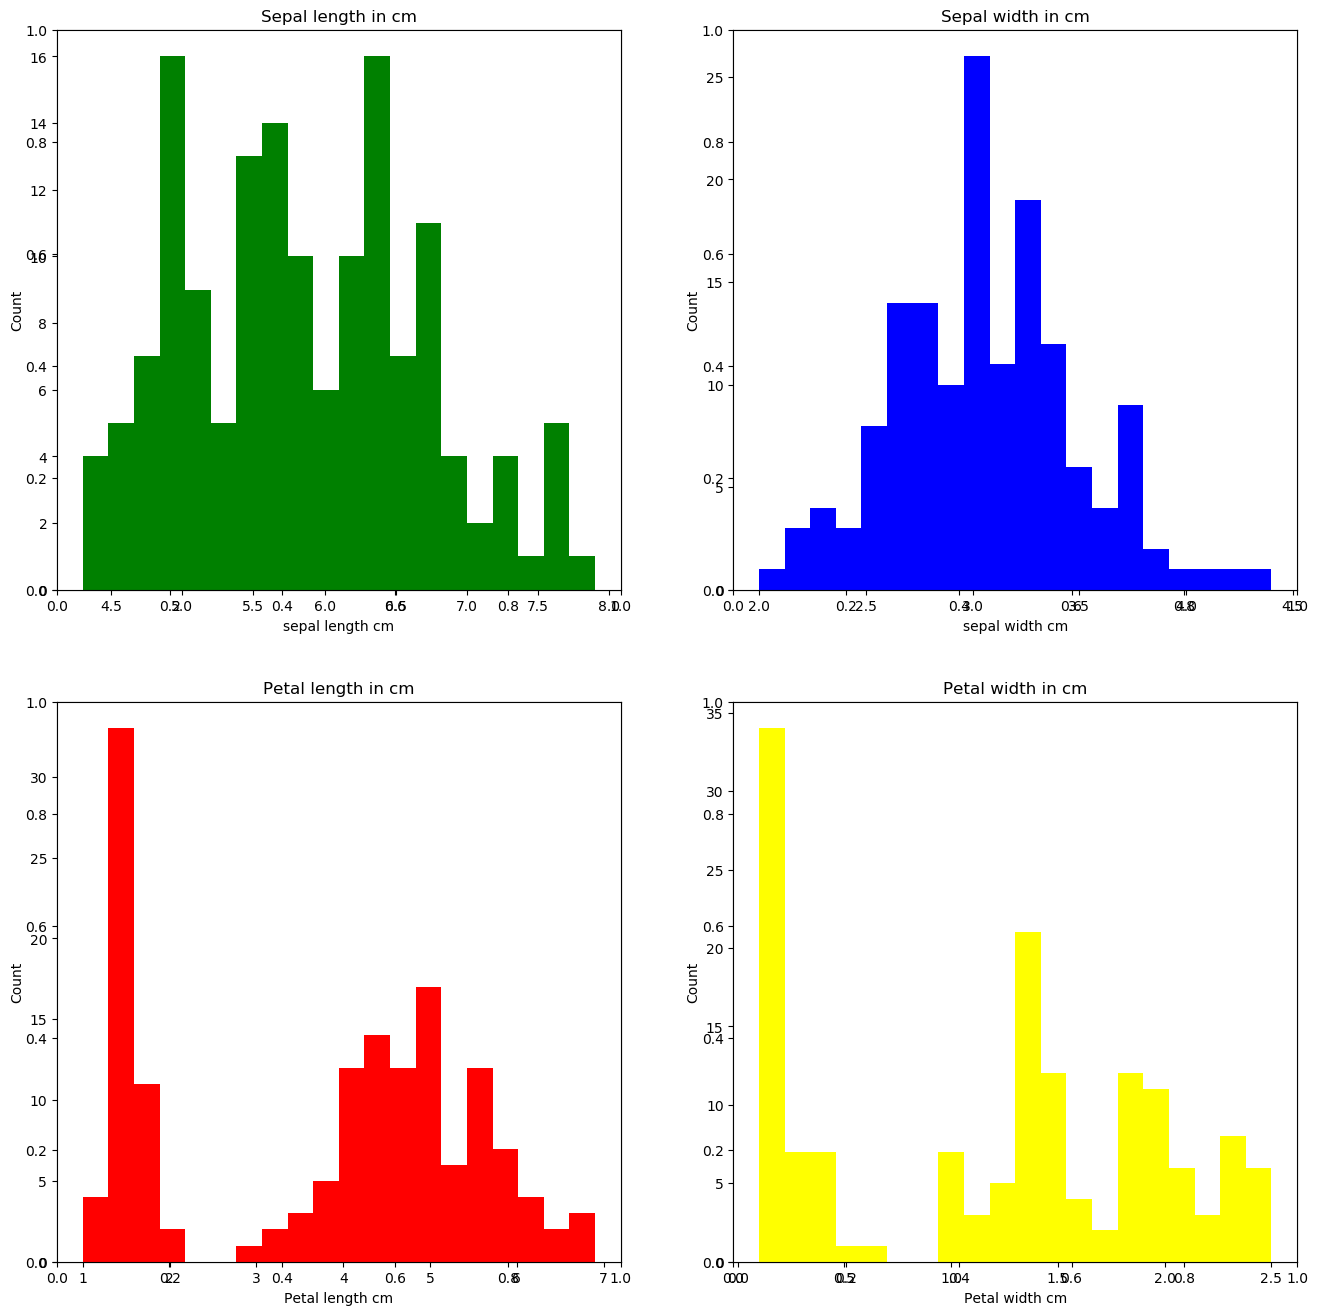

In [115]:
f, axs = plt.subplots(2,2,figsize=(16,16))

ax = f.add_subplot(221)
plt.hist(iris['sepal_length'],bins=20, color='green')
plt.title("Sepal length in cm")
plt.xlabel("sepal length cm")
plt.ylabel("Count")

ax2 = f.add_subplot(222)
plt.hist(iris['sepal_width'],bins=20, color='blue')
plt.title("Sepal width in cm")
plt.xlabel("sepal width cm")
plt.ylabel("Count")

ax2 = f.add_subplot(223)
plt.hist(iris['petal_length'],bins=20, color='red')
plt.title("Petal length in cm")
plt.xlabel("Petal length cm")
plt.ylabel("Count")

ax2 = f.add_subplot(224)
plt.hist(iris['petal_width'],bins=20, color='yellow')
plt.title("Petal width in cm")
plt.xlabel("Petal width cm")
plt.ylabel("Count")

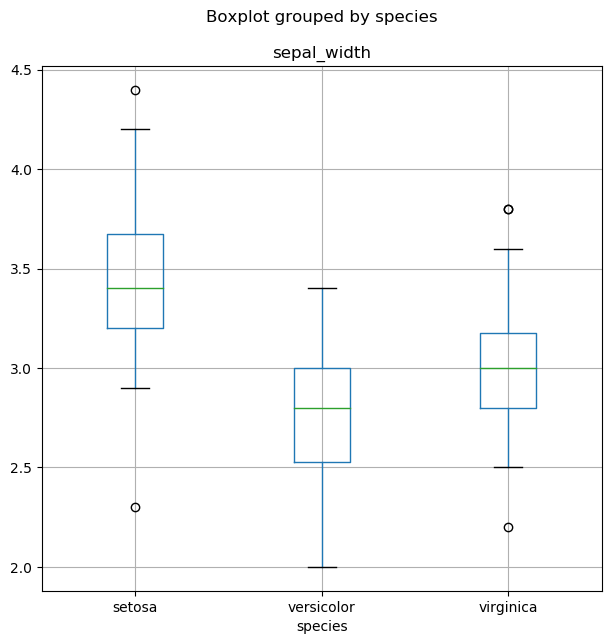

In [117]:
#3 species için nasıl değişiyor box plot ona bakıcaz, sepal_lenght ile türler arası nasıl bir değişim var görebiliriz.
iris.boxplot(column= "sepal_width",
            by='species',
            figsize=(7,7))

C:\Users\asus1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """
C:\Users\asus1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


<Figure size 640x480 with 0 Axes>

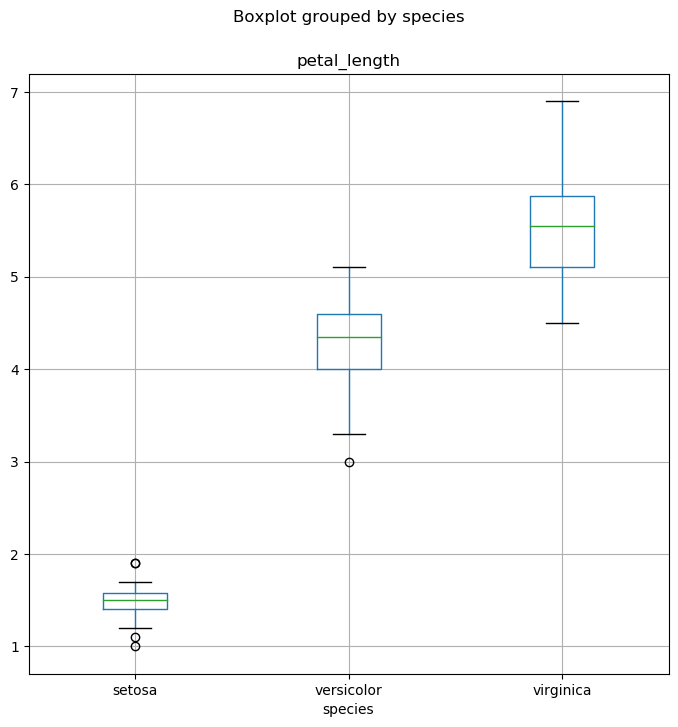

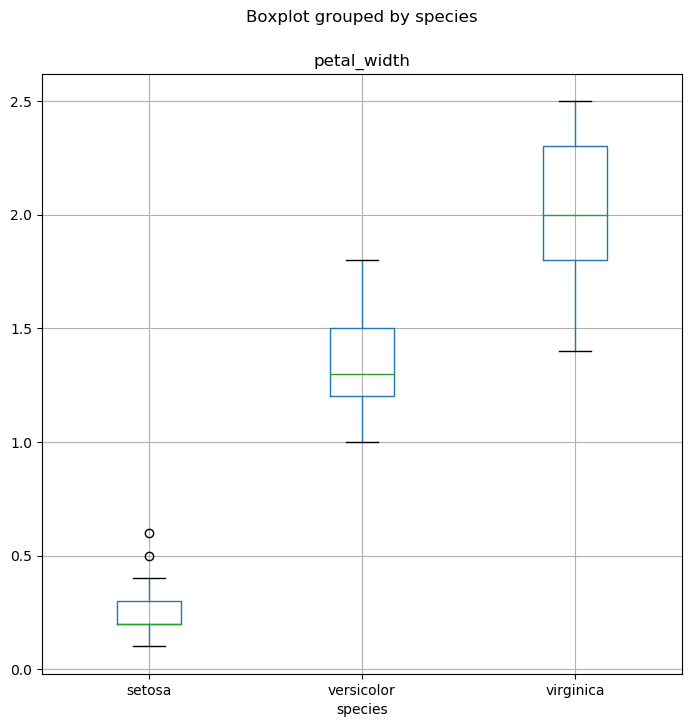

In [118]:
import matplotlib.pyplot as plt

f=plt.figure(1)
iris.boxplot(column="petal_length", by="species", figsize=(8,8))
f.show()
g=plt.figure(2)
iris.boxplot(column="petal_width", by="species", figsize=(8,8))
g.show()

In [119]:
import pandas as pd
###unique değerleri al iristen
grps=pd.unique(iris.species.values)
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [120]:
### grps den aldıklarını iris'in species olduğunu tara ve her bir türün sepal length'inin nasıl dağıldığını gösterir
## normal dağılım göstermezse transformation metotlarını yaparsın.
### burada baktığında hepsi normal dağılıyor 
for name in grps:
    print(name,shapiro(iris['sepal_length'][iris['species']==name]))

setosa (0.9776989221572876, 0.4595281183719635)
versicolor (0.9778355956077576, 0.46473264694213867)
virginica (0.9711798429489136, 0.25832483172416687)


In [121]:
### burada baktığında hepsi normal dağılıyor 
for name in grps:
    print(name,shapiro(iris['petal_length'][iris['species']==name]))

setosa (0.9549766182899475, 0.05481043830513954)
versicolor (0.9660047888755798, 0.1584833413362503)
virginica (0.9621862769126892, 0.10977369546890259)


In [122]:
### verimin normal dağılım gösterdiği bileşeni bulmaya çalışıp ordan analiz yapmak daha kolaydır.
### grps den aldıklarını iris'in species olduğunu tara ve her bir türün petal width'inin nasıl dağıldığını gösterir
### setosa ve versicolor normal dağılmıyor
for name in grps:
    print(name,shapiro(iris['petal_width'][iris['species']==name]))

setosa (0.7997642159461975, 8.65842082475865e-07)
versicolor (0.947626531124115, 0.027278218418359756)
virginica (0.9597718715667725, 0.08695744723081589)


In [123]:
### burada baktığında hepsi normal dağılıyor 
for name in grps:
    print(name,shapiro(iris['sepal_width'][iris['species']==name]))

setosa (0.97171950340271, 0.2715264856815338)
versicolor (0.9741330742835999, 0.33798879384994507)
virginica (0.9673910140991211, 0.1809043288230896)


In [124]:
#datamız normalden gelmiyorsa levene kullanmak daha avantajlı olur, levene daha güvende tutar. barttlet daha olumsuz sonuc verir
#bartlett normal dağılım oldupundan daha emin olduğumuzda

from scipy.stats import bartlett
bartlett(iris['sepal_width'][iris['species'] == 'setosa'],
        iris['sepal_width'][iris['species'] == 'versicolor'],
        iris['sepal_width'][iris['species'] == 'virginica'],)

BartlettResult(statistic=2.0910752014391774, pvalue=0.35150280041581317)

In [125]:
#3 grup arasındaki dağılıma bakmamıza
from scipy.stats import levene
levene(iris['sepal_width'][iris['species'] == 'setosa'],
        iris['sepal_width'][iris['species'] == 'versicolor'],
        iris['sepal_width'][iris['species'] == 'virginica'],)

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

In [126]:
from scipy.stats import bartlett
bartlett(iris['petal_width'][iris['species'] == 'setosa'],
        iris['petal_width'][iris['species'] == 'versicolor'],
        iris['petal_width'][iris['species'] == 'virginica'],)

BartlettResult(statistic=39.2131139455632, pvalue=3.0547839321996904e-09)

In [127]:
#3 grup arasındaki dağılıma bakmamıza
from scipy.stats import levene
levene(iris['petal_width'][iris['species'] == 'setosa'],
        iris['petal_width'][iris['species'] == 'versicolor'],
        iris['petal_width'][iris['species'] == 'virginica'],)

LeveneResult(statistic=19.892438674871457, pvalue=2.260519740405839e-08)

In [128]:
##sepal width türleri ayrıştırabilmek için anlamlı bir değişken olmus oluyor yani sonucta çıkan p=0, reject bölgeye düştüğü için
## anova için normal dağılım ve constant var olması gerekir 
## pvalue değerine göre ben bu değişkeni modelde kullanayım mı kullanmayayım mı,pvalue < alpha olduğundan reject bölgeye düştü
f_oneway(iris['sepal_width'][iris['species'] == 'setosa'],
        iris['sepal_width'][iris['species'] == 'versicolor'],
        iris['sepal_width'][iris['species'] == 'virginica'],)

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

In [129]:
#ols regression
import statsmodels.formula.api as smf
results=smf.ols('sepal_width ~ species', data=iris).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     49.16
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           4.49e-17
Time:                        20:05:21   Log-Likelihood:                -49.366
No. Observations:                 150   AIC:                             104.7
Df Residuals:                     147   BIC:                             113.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.4280      0.048     71.359      0.000       3.333       3.523
species[T.versicolor]    -0.6580      0.068     -9.685      0.000      -0.792      -0.524
species[T.virginica]     -0.4540      0.068     -6.683      0.000      -0.588      -0.320
==============================================================================
Omnibus:                        1.920   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.632
Skew:                           0.027   Prob(JB):                        0.442
Kurtosis:                       3.508   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""